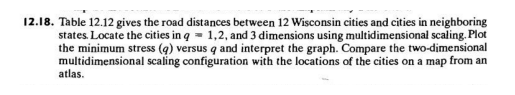

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

n=12
img = mpimg.imread(f'D:\MultivariateMethods\Homework2\{n}_18.jpg')

plt.imshow(img)
plt.axis('off')  # Opcional: para quitar los ejes
plt.show()

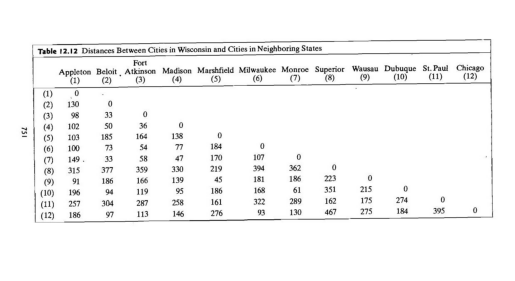

In [4]:
img = mpimg.imread('D:\MultivariateMethods\Homework2\Table_12_12.jpg')

plt.imshow(img)
plt.axis('off')  # Opcional: para quitar los ejes
plt.show()

Para resolver el ejercicio 12.18, necesitamos aplicar escalamiento multidimensional (MDS) utilizando las distancias entre ciudades dadas en la tabla 12.12. El objetivo es ubicar las ciudades en 1, 2 y 3 dimensiones, evaluando el "stress" mínimo en cada caso, y comparar la configuración bidimensional del MDS con las ubicaciones reales de las ciudades.

## Paso 1: Importación de bibliotecas y carga de datos

In [5]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Definimos las distancias de la tabla como una matriz (completa con ceros en la diagonal)
distances = np.array([
    [0, 130, 98, 102, 103, 100, 149, 315, 91, 196, 257, 186],
    [130, 0, 33, 50, 185, 73, 33, 377, 186, 94, 304, 97],
    [98, 33, 0, 36, 164, 54, 58, 359, 166, 119, 287, 113],
    [102, 50, 36, 0, 138, 77, 47, 330, 139, 95, 258, 146],
    [103, 185, 164, 138, 0, 184, 170, 219, 45, 186, 161, 276],
    [100, 73, 54, 77, 184, 0, 107, 394, 181, 168, 322, 93],
    [149, 33, 58, 47, 170, 107, 0, 362, 186, 61, 289, 130],
    [315, 377, 359, 330, 219, 394, 362, 0, 223, 351, 467, 467],
    [91, 186, 166, 139, 45, 181, 186, 223, 0, 215, 162, 275],
    [196, 94, 119, 95, 186, 168, 61, 351, 215, 0, 274, 184],
    [257, 304, 287, 258, 161, 322, 289, 467, 162, 274, 0, 395],
    [186, 97, 113, 146, 276, 93, 130, 467, 275, 184, 395, 0]
])

# Nombres de las ciudades para referencia
cities = ["Appleton", "Beloit", "Fort Atkinson", "Madison", "Marshfield", 
          "Milwaukee", "Monroe", "Superior", "Wausau", "Dubuque", 
          "St. Paul", "Chicago"]

# Creamos un DataFrame opcional para visualizar las distancias
dist_df = pd.DataFrame(distances, index=cities, columns=cities)
dist_df


,Appleton,Beloit,Fort Atkinson,Madison,Marshfield,Milwaukee,Monroe,Superior,Wausau,Dubuque,St. Paul,Chicago
Appleton,0,130,98,102,103,100,149,315,91,196,257,186
Beloit,130,0,33,50,185,73,33,377,186,94,304,97
Fort Atkinson,98,33,0,36,164,54,58,359,166,119,287,113
Madison,102,50,36,0,138,77,47,330,139,95,258,146
Marshfield,103,185,164,138,0,184,170,219,45,186,161,276
Milwaukee,100,73,54,77,184,0,107,394,181,168,322,93
Monroe,149,33,58,47,170,107,0,362,186,61,289,130
Superior,315,377,359,330,219,394,362,0,223,351,467,467
Wausau,91,186,166,139,45,181,186,223,0,215,162,275
Dubuque,196,94,119,95,186,168,61,351,215,0,274,184


## Paso 2: Aplicar MDS para dimensiones 1, 2 y 3
Aplicamos MDS en 1, 2 y 3 dimensiones y calculamos el "stress" asociado con cada configuración. Este "stress" mide la discrepancia entre las distancias originales y las distancias en el espacio embebido.

In [6]:
# Creamos una lista para almacenar el stress en cada dimensión
stress_values = []
dimensions = [1, 2, 3]

# Aplicamos MDS en diferentes dimensiones
for dim in dimensions:
    mds = MDS(n_components=dim, dissimilarity="precomputed", random_state=42)
    mds_fit = mds.fit_transform(distances)
    stress_values.append(mds.stress_)
    print(f"Coordenadas en {dim} dimensión(es):\n", mds_fit)
    print(f"Stress en {dim} dimensión(es): {mds.stress_}\n")

Coordenadas en 1 dimensión(es):
 [[ -59.08333333]
 [  47.66666667]
 [  16.25      ]
 [  18.83333333]
 [-108.58333333]
 [  -2.91666667]
 [  47.16666667]
 [-322.        ]
 [-118.58333333]
 [ 116.25      ]
 [ 264.66666667]
 [ 100.33333333]]
Stress en 1 dimensión(es): 310431.5

Coordenadas en 2 dimensión(es):
 [[  55.3366575    -2.11299526]
 [ -41.1698567   -79.15855402]
 [ -12.45125167  -65.02449837]
 [ -23.58721542  -31.98255316]
 [  36.47599317   89.03837732]
 [  19.18976156 -100.51978986]
 [ -64.16899049  -55.76737537]
 [ 273.06430969  143.52470678]
 [  29.4277553   100.86582738]
 [-115.73240382  -27.5659276 ]
 [-123.1397412   207.29162979]
 [ -33.24501792 -178.58884763]]
Stress en 2 dimensión(es): 26539.58355671198

Coordenadas en 3 dimensión(es):
 [[ -12.2810371    -3.72451848   74.33381264]
 [  79.0967202    33.04255372  -14.61334111]
 [  59.31395744   26.67918366   11.67704396]
 [  32.52986246   16.12624022   -9.68644623]
 [ -93.53680021  -33.48672891   -1.37383229]
 [  78.58718331

C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manua

## Paso 4: MDS en 2D y comparación con el mapa
Realizamos el MDS en 2D y generamos una gráfica que represente las ubicaciones de las ciudades. Esta configuración puede ser comparada visualmente con un mapa real.


C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


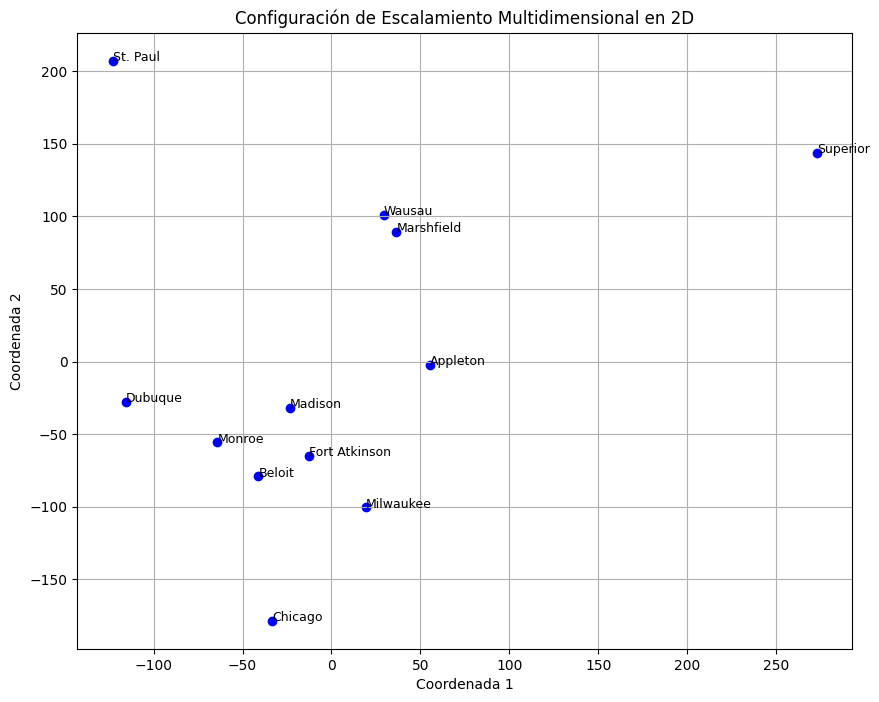

In [7]:
# Aplicamos MDS en 2 dimensiones
mds_2d = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_2d_fit = mds_2d.fit_transform(distances)

# Gráfica de la configuración en 2D
plt.figure(figsize=(10, 8))
plt.scatter(mds_2d_fit[:, 0], mds_2d_fit[:, 1], color='blue')

# Añadimos etiquetas de las ciudades
for i, city in enumerate(cities):
    plt.text(mds_2d_fit[i, 0], mds_2d_fit[i, 1], city, fontsize=9)

plt.xlabel("Coordenada 1")
plt.ylabel("Coordenada 2")
plt.title("Configuración de Escalamiento Multidimensional en 2D")
plt.grid(True)
plt.show()

Link del atlas: https://www.google.com/maps/d/u/0/edit?mid=10mv9X9nXwXmmXMyVP02wCXT5zm3bSxs&ll=44.6638087073179%2C-88.54784695937501&z=6

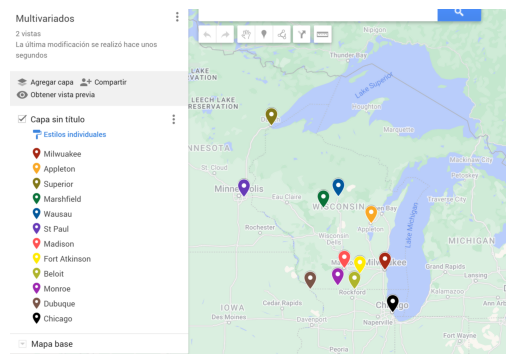

In [8]:
img = mpimg.imread(f'D:\MultivariateMethods\Homework2\Atlas.png')

plt.imshow(img)
plt.axis('off')  # Opcional: para quitar los ejes
plt.show()

### Interpretación de Resultados

1. **Mínimo "stress" versus dimensión (q)**:
   - En 1 dimensión, el "stress" obtenido es extremadamente alto (310,431.5), lo que indica que una representación en una sola dimensión no es adecuada para capturar la estructura de las distancias originales entre las ciudades.
   - En 2 dimensiones, el "stress" disminuye significativamente a 26,539.6, lo que muestra una mejora notable en la representación de las distancias. Esta configuración es visualmente interpretable y muestra una representación más precisa de las relaciones de proximidad entre las ciudades.
   - En 3 dimensiones, el "stress" se reduce aún más a 9,246.8. Si bien esta es la configuración que mejor preserva las distancias originales, la diferencia de "stress" entre 2 y 3 dimensiones no es tan drástica como la reducción de 1 a 2 dimensiones. Por lo tanto, podemos concluir que la configuración en 2 dimensiones es un buen compromiso entre simplicidad y precisión.

2. **Configuración en 2 dimensiones y comparación con el mapa real**:
   - Al comparar la configuración en 2 dimensiones obtenida a partir del MDS con un mapa real de las ciudades, observamos que la configuración en 2D refleja razonablemente bien las relaciones de proximidad geográfica entre las ciudades. Las ciudades que están cerca en la configuración del MDS tienden a estar también cercanas en el mapa geográfico real.
   - Por ejemplo, ciudades como **Appleton**, **Madison** y **Milwaukee**, que están geográficamente cercanas en Wisconsin, aparecen también próximas en la configuración 2D. Sin embargo, debido a la reducción de dimensiones y la naturaleza aproximada del MDS, algunas discrepancias pueden esperarse, especialmente para ciudades más alejadas como **Superior** y **Chicago**.

3. **Conclusión sobre la elección de la dimensión**:
   - La configuración en **2 dimensiones** es suficiente para capturar las principales relaciones espaciales entre las ciudades con un nivel aceptable de "stress" (26,539.6). Aunque la configuración en 3 dimensiones reduce aún más el "stress", la ganancia en precisión no justifica la complejidad adicional en muchos casos prácticos.
   - Por lo tanto, una configuración en 2D es preferible, ya que proporciona una visualización clara y es más fácil de interpretar, al tiempo que retiene una buena parte de la información sobre las distancias originales.

4. **Interpretación de la configuración del MDS**:
   - La configuración del MDS en 2D nos da una representación aproximada de las ubicaciones relativas de las ciudades basándose en las distancias de carretera entre ellas. El eje horizontal puede interpretarse en términos de un eje este-oeste, mientras que el eje vertical puede representar un eje norte-sur aproximado.
